In [1]:
# Uncomment this session to install packages 
# install.packages('ggplot2')
# install.packages('gapminder')
# install.packages('gganimate')
# install.packages('gifski')
# install.packages('av')
# install.packages('Rcpp')

In [1]:
library(ggplot2)
library(gganimate)
library(gridExtra)
library(plotly)

In [58]:
# Data generation
set.seed(1)
n=200; # 200 balls 
a=5; # 5 factor levels (colors)
#b=5;

#radius.mean=2*(2:(a+1)+ (6-b):5); 


mus=2*((c(4,1,3,5,2)+1));

#radius.mean=rep(3,r);  # What if we set the mean to be the same?
A<-rep(1:a,times=40)
#B<-rep(1:b,each=40)

#Y=2*(2*A+ 6-B)+rnorm(n,sd=1); # response Y
Y=(2*mus[A])+rnorm(n,sd=1.5); # response Y



In [59]:
# Parameters for visualizations
T = 10; # frame number for animation
xyrange=6;
# x and y coordinates

coords.A=matrix(0,nrow=n,ncol=T);
#coords.B=matrix(0,nrow=n,ncol=T)
coords.A[,1]= xyrange*runif(n);
#coords.B[,1]= xyrange*runif(n);

coords.A[,T]= A + 0.8*(runif(n)-0.5);
#coords.B[,T]= B + 0.8*(runif(n)-0.5);

for(i in 1:n){
    coords.A[i,]=seq(from=coords.A[i,1],to=coords.A[i,T],length.out=T)
#    coords.B[i,]=seq(from=coords.B[i,1],to=coords.B[i,T],length.out=T)
    }


In [60]:
# Wrap these into a data.frame (in order to use ggplot2)
# Add a few plots at the end 
example.ANOVA<-data.frame(
    A=A,
  #  B=B,
    Y=Y,
    coords.A=coords.A[,1],
   # coords.B=coords.B[,1],
    ID= 1:n,
    t= rep(1,n)
    )

for(l in 2:(T+6) ){
    tmp.ANOVA<-data.frame(
    A=A,
   # B=B,
    Y=Y,
    coords.A=coords.A[,1],
    #coords.B=coords.B[,1],
    ID= 1:n,
    t= rep(l,n)
    )
    k=l
    if(l>T){
        k=T
        }
    tmp.ANOVA$coords.A<-coords.A[,k]
  #  tmp.ANOVA$coords.B<-coords.B[,k]
    example.ANOVA<-rbind(example.ANOVA,tmp.ANOVA)
    }


In [61]:
# variance estimate:

var.all=var(Y) 

ssto= sum((Y-mean(Y))^2)

var.all - ssto/(n-1)

[1] 0

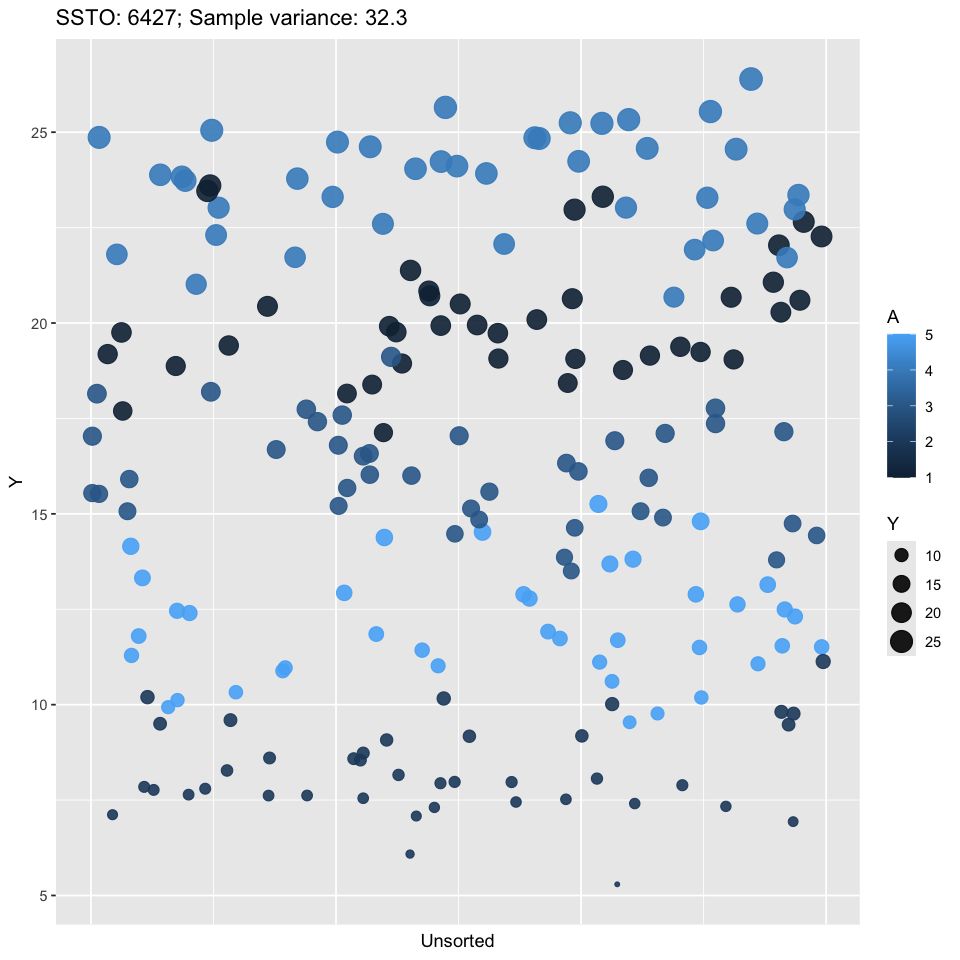

In [62]:
# Visualize the data with colors by X

options(repr.plot.width=8, repr.plot.height=8)
tmp.data<-example.ANOVA[example.ANOVA$t==1,]
ggplot(tmp.data, aes(coords.A, Y, size = Y,color=A)) +
  geom_point(alpha = 0.9) +  
  labs(title = paste('SSTO: ', round(ssto,2), '; Sample variance: ', round(var.all,2),sep='') , 
       x = 'Unsorted', y = 'Y') +
  theme(axis.text.x=element_blank(),
        axis.ticks.x=element_blank())


  

In [64]:

# Animation

options(repr.plot.width=8, repr.plot.height=8)
ggplot(example.ANOVA, aes(coords.A, Y, size = Y,color=A)) +
  geom_point(alpha = 0.9) +
  labs(x = ' ', y = 'Y') +
  theme(axis.text.x=element_blank(),
        axis.ticks.x=element_blank())+
  # gganimate specific bits:
  transition_time(t) +
  ease_aes('linear')



anim_save("../Figures/Ch4/anova-sorting.gif")


Rendering [=>-------------------------------------------] at 23 fps ~ eta:  4s

Rendering [==>------------------------------------------] at 22 fps ~ eta:  4s

Rendering [===>-----------------------------------------] at 22 fps ~ eta:  4s

Rendering [===>-----------------------------------------] at 21 fps ~ eta:  4s

Rendering [====>----------------------------------------] at 21 fps ~ eta:  4s

Rendering [=====>---------------------------------------] at 21 fps ~ eta:  4s

Rendering [======>--------------------------------------] at 21 fps ~ eta:  4s

Rendering [======>--------------------------------------] at 20 fps ~ eta:  4s

Rendering [=======>-------------------------------------] at 20 fps ~ eta:  4s

Rendering [========>------------------------------------] at 20 fps ~ eta:  4s

Rendering [=========>-----------------------------------] at 20 fps ~ eta:  4s

Rendering [==========>----------------------------------] at 20 fps ~ eta:  4s

Rendering [===========>----------------

In [71]:
# Calculate the residual sum of squares and variance of the error terms

anova.fit=aov(Y~as.factor(A))
anova.table=summary(anova.fit)

sse=anova.table[[1]][2,2]
mse=anova.table[[1]][2,3]
df.mse=n-2;
mse-sse/df.mse

[1] 0.02937577

In [74]:
###### Visualize the data side by side 

options(repr.plot.width=6, repr.plot.height=6)
jpeg('../Figures/Ch4/anova-unsorted.jpg',width=480, height=480)

tmp.data<-example.ANOVA[example.ANOVA$t==1,]
ggplot(tmp.data, aes(coords.A, Y, size = Y,color=A)) +
  geom_point(alpha = 0.9) +  
  labs(title = paste('SSTO: ', round(ssto,2), '; Sample variance: ', round(var.all,2),sep='') , 
       x = 'Unsorted', y = 'Y') +
  theme(axis.text.x=element_blank(),
        axis.ticks.x=element_blank())
dev.off()
  
jpeg('../Figures/Ch4/anova-sorted.jpg',width=480, height=480)
tmp.data<-example.ANOVA[example.ANOVA$t==T,]
ggplot(tmp.data, aes(coords.A, Y, size = Y,color=A)) +
  geom_point(alpha = 0.9) +  
    labs(title = paste('SSE: ', round(sse,2), '; var. err.: ', round(mse,2),sep='') , 
         x = 'A (jittered)', y = 'Y') +
     geom_vline(xintercept = 0.5+(0:5), linetype="dotted", 
                color = "red", linewidth=1)+
      theme_bw() 
dev.off()

pdf 
  2

pdf 
  2

In [38]:
?jpeg